# Distributed Computing with Dask: Step-by-step Exercise

Mahdi Farnaghi and Mahdi Khodadadzadeh

October 2024


**Objective: Explore distributed computing concepts using Dask for Exploratory Data Analysis (EDA).**

## Dataset

### Description 

In this exercise, we will be using the **Iris dataset**, one of the most well-known datasets in data science. The Iris dataset contains 150 samples from three species of Iris flowers: *Iris setosa*, *Iris virginica*, and *Iris versicolor*. Each sample has four features:

1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

These features describe the physical characteristics of the flowers, which are used to classify the species. The dataset is widely used for classification tasks and exploratory data analysis (EDA).

---

### Dataset Columns:

- **sepal length**: Length of the sepal (in cm).
- **sepal width**: Width of the sepal (in cm).
- **petal length**: Length of the petal (in cm).
- **petal width**: Width of the petal (in cm).
- **species**: The species of the Iris flower (*Iris setosa*, *Iris virginica*, or *Iris versicolor*).

---

We will use this dataset to explore how Dask can be applied to distributed computing tasks for data analysis.

---

## Installation

In [1]:
!pip install -q "dask[distributed]" --upgrade 
!pip install -q dask[dataframe]
!pip install -q scipy

In [136]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

## Step 1: Setting up the Dask Client

Task: Initialize a Dask Client to enable parallel and distributed computing.

In [8]:
from dask.distributed import Client
client = Client()

x:\big_geo_data\mongodb_env\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 5976 instead
  f"Port {expected} is already in use.\n"


## Step 2: Load the dataset using Dask

Task: Load the Iris dataset using `dask.read_csv`.

Instruction: Use Dask's `read_csv` to load the Iris dataset. This is similar to how you use `pandas.read_csv`. Print the first 5 rows of the dataset.

In [69]:
ddf=dd.read_csv("EDA_iris.csv", names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
ddf.head(10)


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Step 3: Set the Index

Task: Set the species as the index for the dataframe.

Instruction: Change the index of the dataframe to 'species' and check how the dataset looks after the change.

In [70]:
ddf=ddf.set_index('species')
ddf.head()

,sepal length,sepal width,petal length,petal width
species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


## Step 6: Getting Data Information

Task: Retrieve information about the dataframe's columns and types.

Instruction: Use .info() to explore the dataframe's structure.

In [71]:
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 4 entries, sepal length to petal width
dtypes: float64(4)

Task: Compute descriptive statistics for the dataset.

Instruction: Use .describe() to calculate statistics for each column and ensure that you trigger computation with .compute().

In [72]:
x=ddf.describe()
x.compute()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 4: Slicing the Dataset

Task: Perform slicing on the dataframe to select specific rows.

Instruction: Select a few rows from the dataframe and compute them using Dask's parallel computation.

In [73]:
full_ddf=ddf.compute()
sliced_dask_df = full_ddf.iloc[3:7]
print(sliced_dask_df)

             sepal length  sepal width  petal length  petal width
species                                                          
Iris-setosa           4.6          3.1           1.5          0.2
Iris-setosa           5.0          3.6           1.4          0.2
Iris-setosa           5.4          3.9           1.7          0.4
Iris-setosa           4.6          3.4           1.4          0.3


## Step 5: Mean, Quantiles, and Variance

Task: Compute the mean, quantiles, and variance of the dataset.

Instruction: Calculate the mean, quantiles, and variance of the dataset.

In [75]:
#The mean and quantiles of the dataframe
x=ddf.describe()
x.compute()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
# The variance of the dataset.
var=ddf.var()
var.compute()

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

## Step 6: Data Visualization

Task: Visualize the distribution of columns using histograms and density plots.

Instruction: Plot the histogram and kernel density estimate (KDE) for the 'sepal length' column.

<AxesSubplot:ylabel='Density'>

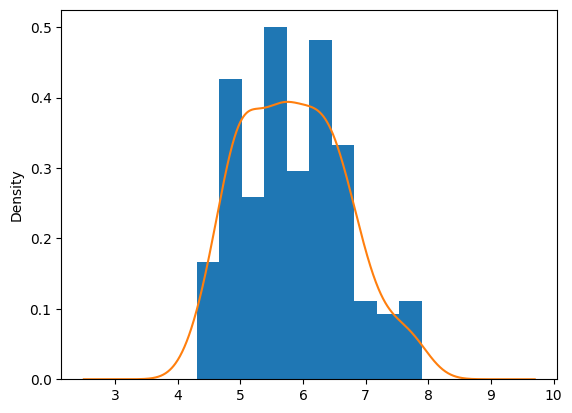

In [104]:
sepal_length = ddf['sepal length'].compute()
sepal_length.hist(bins=10, density=True)
sepal_length.plot.kde()

## Step 7: Pie and Bar Charts

Task: Create a pie chart and bar chart based on species count.

Instruction: Visualize the species distribution using a pie chart and a bar chart.

<AxesSubplot:ylabel='species'>

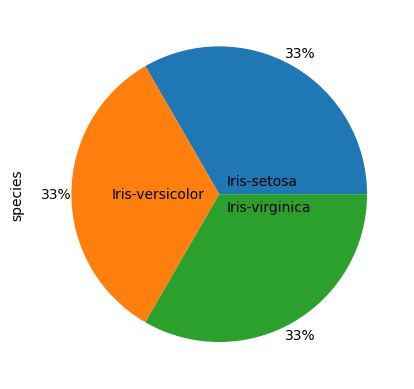

In [110]:
species_count = ddf.index.value_counts().compute()
species_count.plot.pie(labeldistance=0.1, pctdistance=1.1, autopct='%1.0f%%')

## Step 8: Covariance and Correlation

Task: Compute the covariance and correlation of the dataset.

Instruction: Calculate and display the covariance and correlation between columns.

In [111]:
c_var=ddf.cov()
c_var.compute()

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [113]:
correlation=ddf.corr()
correlation.compute()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## Step 8: Boxplot and Scatterplot

Task: Create a boxplot and scatterplot of the dataset.

Instruction: Generate a boxplot and scatterplot to explore the data distribution.

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

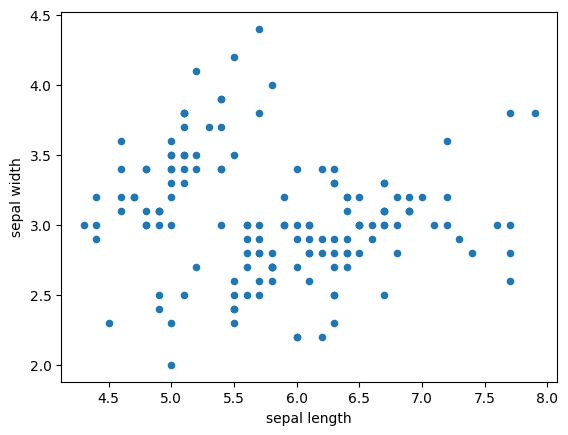

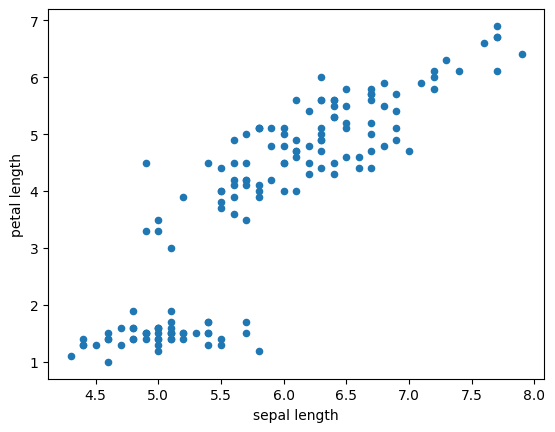

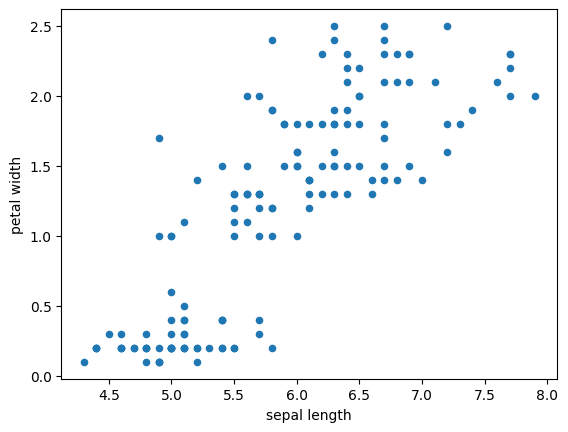

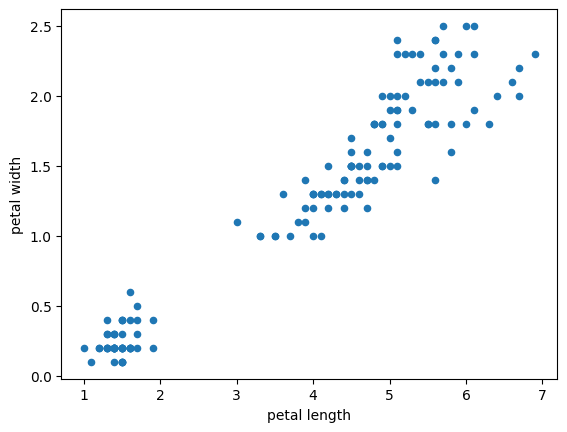

In [121]:
ddf.compute().plot.scatter('sepal length','sepal width')
ddf.compute().plot.scatter('sepal length','petal length')
ddf.compute().plot.scatter('sepal length','petal width')
ddf.compute().plot.scatter('petal length','petal width')

<AxesSubplot:>

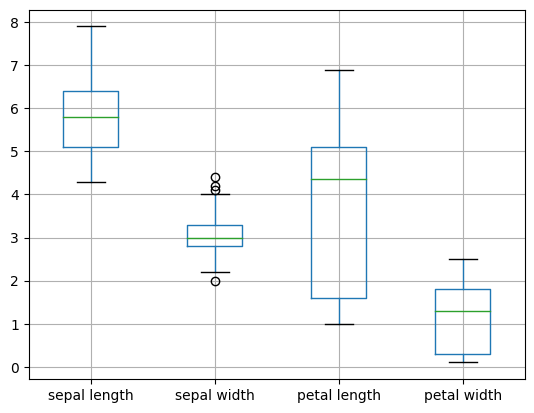

In [124]:
ddf.compute().boxplot()

## Step 9: Advanced Plots (3D and Hexbin)

Task: Create advanced visualizations such as a 3D plot and hexbin plot.

Instruction: Create a 3D scatter plot and a hexbin plot to visualize the relationship between petal length and width.

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

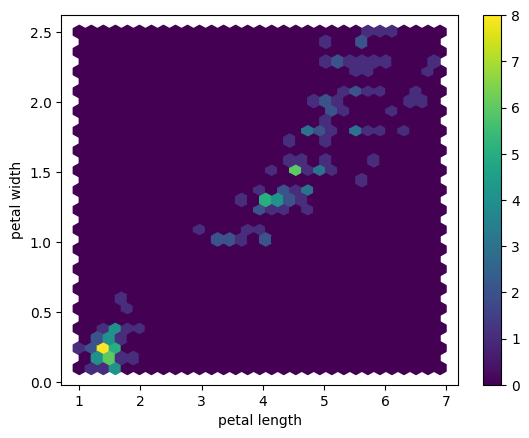

In [134]:
ddf.compute().plot.hexbin('petal length','petal width',gridsize=30,cmap="viridis")

x:\big_geo_data\mongodb_env\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """Entry point for launching an IPython kernel.


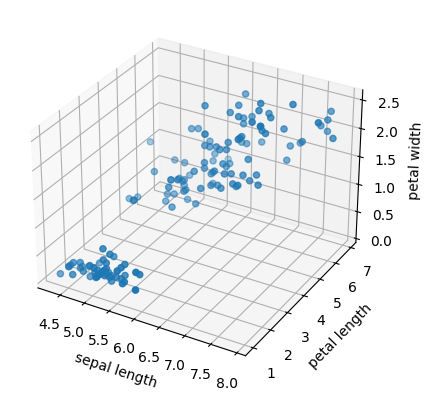

In [141]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(ddf['sepal length'],ddf['petal length'], ddf['petal width'])
threedee.set_xlabel('sepal length')
threedee.set_ylabel('petal length')
threedee.set_zlabel('petal width')
plt.show()


# source:https://pythonprogramming.net/3d-graphing-pandas-matplotlib/

## Final Step: Closing the Dask Client

Task: Properly close the Dask Client when done.

Instruction: Always remember to close the Dask Client when you're finished with the tasks.

In [142]:
client.close()